<a href="https://colab.research.google.com/github/whynotkush/Computer-Vision/blob/main/CNN_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> <center>Food images Classifier Using CNN </center> </h1>
<h2> <center>  Vaibhav Gupta </center> </h2>
<h2> <center>  2020201040 </center> </h2>


## Download Necessary Packages 📚

In [ ]:
!pip install aicrowd-cli

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Download Data
The first step is to download out train test data. We will be training a model on the train data and make predictions on test data. We submit our predictions.


In [ ]:
API_KEY = "fd1aed7204268f0bae2780fb808a4063" #Please enter your API Key from [https://www.aicrowd.com/participants/me]
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [ ]:
!aicrowd dataset download --challenge chunin-exams-food-track-cv-2021

train_images.zip: 100% 754M/754M [00:19<00:00, 38.3MB/s]
test_images.zip: 100% 33.9M/33.9M [00:01<00:00, 26.8MB/s]
train.csv: 100% 253k/253k [00:00<00:00, 976kB/s]
test.csv: 100% 7.27k/7.27k [00:00<00:00, 829kB/s]


In [ ]:
!mkdir data
!mkdir data/test
!mkdir data/train
!unzip train_images -d data/train
!unzip test_images -d data/test

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import os

Reading train.csv

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
#shuffle
train = train.sample(frac = 1)

In [ ]:
train.head()

,ImageId,ClassName
3789,ed9d378e88.jpg,espresso-with-caffeine
7889,36b7d40e99.jpg,water
6659,0f1a629e3e.jpg,jam
1089,ed6f280bae.jpg,bread-sourdough
4785,be2ceaea89.jpg,soft-cheese


Reading test.csv

In [ ]:
test_csv = pd.read_csv('test.csv')

In [ ]:
test_csv.head(1)

,ImageId
0,90e63a2fde.jpg


Encoding Target labels with sklearn.preprocessing.LabelEncoder

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
fitted_ = le.fit(train['ClassName'])

In [ ]:
list_of_labels = fitted_.classes_

In [ ]:
list_of_labels

array(['almonds', 'apple', 'avocado', 'banana', 'beer', 'biscuits',
       'boisson-au-glucose-50g', 'bread-french-white-flour',
       'bread-sourdough', 'bread-white', 'bread-whole-wheat',
       'bread-wholemeal', 'broccoli', 'butter', 'carrot', 'cheese',
       'chicken', 'chips-french-fries', 'coffee-with-caffeine', 'corn',
       'croissant', 'cucumber', 'dark-chocolate', 'egg',
       'espresso-with-caffeine', 'french-beans', 'gruyere', 'ham-raw',
       'hard-cheese', 'honey', 'jam', 'leaf-spinach', 'mandarine',
       'mayonnaise', 'mixed-nuts', 'mixed-salad-chopped-without-sauce',
       'mixed-vegetables', 'onion', 'parmesan', 'pasta-spaghetti',
       'pickle', 'pizza-margherita-baked', 'potatoes-steamed', 'rice',
       'salad-leaf-salad-green', 'salami', 'salmon', 'sauce-savoury',
       'soft-cheese', 'strawberries', 'sweet-pepper', 'tea', 'tea-green',
       'tomato', 'tomato-sauce', 'water', 'water-mineral',
       'white-coffee-with-caffeine', 'wine-red', 'wine-white'

In [ ]:
transformed_lol = le.transform(list_of_labels)

In [ ]:
transformed_lol

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

In [ ]:
le.inverse_transform(transformed_lol)

array(['almonds', 'apple', 'avocado', 'banana', 'beer', 'biscuits',
       'boisson-au-glucose-50g', 'bread-french-white-flour',
       'bread-sourdough', 'bread-white', 'bread-whole-wheat',
       'bread-wholemeal', 'broccoli', 'butter', 'carrot', 'cheese',
       'chicken', 'chips-french-fries', 'coffee-with-caffeine', 'corn',
       'croissant', 'cucumber', 'dark-chocolate', 'egg',
       'espresso-with-caffeine', 'french-beans', 'gruyere', 'ham-raw',
       'hard-cheese', 'honey', 'jam', 'leaf-spinach', 'mandarine',
       'mayonnaise', 'mixed-nuts', 'mixed-salad-chopped-without-sauce',
       'mixed-vegetables', 'onion', 'parmesan', 'pasta-spaghetti',
       'pickle', 'pizza-margherita-baked', 'potatoes-steamed', 'rice',
       'salad-leaf-salad-green', 'salami', 'salmon', 'sauce-savoury',
       'soft-cheese', 'strawberries', 'sweet-pepper', 'tea', 'tea-green',
       'tomato', 'tomato-sauce', 'water', 'water-mineral',
       'white-coffee-with-caffeine', 'wine-red', 'wine-white'

In [ ]:
targets = le.fit_transform(train['ClassName'])

In [ ]:
targets

array([24, 55, 30, ...,  9, 38, 12])

In [ ]:
ntrain = train.copy()

In [ ]:
ntrain['ClassName'] = targets

In [ ]:
ntrain.head()

,ImageId,ClassName
3789,ed9d378e88.jpg,24
7889,36b7d40e99.jpg,55
6659,0f1a629e3e.jpg,30
1089,ed6f280bae.jpg,8
4785,be2ceaea89.jpg,48


DATALOADER

In [ ]:
train_img_lst , train_img_labels ,test_imgs = [],[],[]
for i in range(len(ntrain.to_numpy()) ) :
  train_img_lst.append('data/train/train_images/' + ntrain['ImageId'][i])
  train_img_labels.append(ntrain['ClassName'][i])

for i in range(len(test_csv.to_numpy())) :
  test_imgs.append('data/test/test_images/'+test_csv['ImageId'][i])

In [ ]:
train_img_lst[0]

'data/train/train_images/f27632d7e5.jpg'

In [ ]:
train_img_labels[0]

55

In [ ]:
test_imgs[0]

'data/test/test_images/90e63a2fde.jpg'

Reading images

In [ ]:
import cv2
def img_read(img_path_list):
    resize_img_list = []
    for img_path in img_path_list:
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128)) / 255
        resize_img_list.append(img)
    return np.array(resize_img_list)

In [ ]:
X_train = img_read(train_img_lst)
X_test = img_read(test_imgs)

In [ ]:
y_train = np.array(train_img_labels)

In [ ]:
X_train.shape

(9323, 128, 128, 3)

In [ ]:
X_test.shape

(484, 128, 128, 3)

In [ ]:
y_train.shape

(9323,)

### Plot Samples

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    lbl = le.inverse_transform([y[index]])
    plt.xlabel(lbl[0])

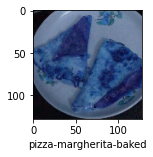

In [ ]:
plot_sample(X_train , y_train , 1)

## With Batch Normalisation

In [ ]:
cnn_wbn = models.Sequential([
    #cnn layers
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu",padding = "same" ,input_shape = (128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    #dense layers
    layers.Flatten(), 
    layers.Dense(128, activation = "relu"),
    layers.Dense(61, activation = "softmax")
])

In [ ]:
cnn_wbn.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam", metrics = ["accuracy"])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()
itr = datagen.flow(X_train, y_train)
cnn_wbn.fit_generator(itr, epochs = 4)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/4
292/292 [==============================] - 350s 1s/step - loss: 4.5628 - accuracy: 0.0968
Epoch 2/4
292/292 [==============================] - 348s 1s/step - loss: 3.6913 - accuracy: 0.1480
Epoch 3/4
292/292 [==============================] - 349s 1s/step - loss: 3.3290 - accuracy: 0.1851
Epoch 4/4
292/292 [==============================] - 349s 1s/step - loss: 3.1860 - accuracy: 0.2023


In [ ]:
y_pred_wbn = cnn_wbn.predict(X_test)

In [ ]:
y_classes_wbn = [np.argmax(element) for element in y_pred_wbn]

Plotting predicted label for test Image 3

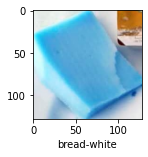

In [ ]:
plot_sample(X_test , y_classes_wbn , 3)

## Adding New layers

In [ ]:
cnn_new_layers = models.Sequential([
    #cnn layers
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu",padding = "same" ,input_shape = (128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters = 256, kernel_size = (3, 3), activation = "relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    #dense layers
    layers.Flatten(), 
    layers.Dense(256, activation = "relu"),
    layers.Dense(61, activation = "softmax")
])

In [ ]:
cnn_new_layers.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam", metrics = ["accuracy"])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()
itr = datagen.flow(X_train, y_train)
history_new_layers = cnn_new_layers.fit_generator(itr, epochs = 4)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/4
292/292 [==============================] - 349s 1s/step - loss: 4.1575 - accuracy: 0.1426
Epoch 2/4
292/292 [==============================] - 362s 1s/step - loss: 3.1598 - accuracy: 0.2159
Epoch 3/4
292/292 [==============================] - 361s 1s/step - loss: 2.7915 - accuracy: 0.2704
Epoch 4/4
292/292 [==============================] - 354s 1s/step - loss: 2.5984 - accuracy: 0.3043


## With Dropout

In [ ]:
cnn_dropout = models.Sequential([
    #cnn layers
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu",padding = "same" ,input_shape = (128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    
    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    
    layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(filters = 256, kernel_size = (3, 3), activation = "relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    #dense layers
    layers.Flatten(), 
    layers.Dense(256, activation = "relu"),
    layers.Dense(61, activation = "softmax")
])

In [ ]:
cnn_dropout.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam", metrics = ["accuracy"])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()
itr = datagen.flow(X_train, y_train)
history_dropout = cnn_dropout.fit_generator(itr, epochs = 4)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/4
292/292 [==============================] - 349s 1s/step - loss: 2.3875 - accuracy: 0.3416
Epoch 2/4
292/292 [==============================] - 347s 1s/step - loss: 2.1339 - accuracy: 0.4024
Epoch 3/4
292/292 [==============================] - 347s 1s/step - loss: 1.8777 - accuracy: 0.4600
Epoch 4/4
292/292 [==============================] - 346s 1s/step - loss: 1.5578 - accuracy: 0.5367


In [ ]:
y_pred = cnn_dropout.predict(X_test)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]

Plotting Predicted label for test image 5

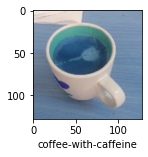

In [ ]:
plot_sample(X_test , y_classes , 5)

## Different Activation Functions

In [ ]:
from tensorflow.keras import activations

#### SELU

In [ ]:
cnn_selu = models.Sequential([
    #cnn layers
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = "selu",padding = "same" ,input_shape = (128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    
    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = "selu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    
    layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = "selu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(filters = 256, kernel_size = (3, 3), activation = "selu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    #dense layers
    layers.Flatten(), 
    layers.Dense(256, activation = "selu"),
    layers.Dense(61, activation = "softmax")
])

In [ ]:
cnn_selu.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam", metrics = ["accuracy"])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()
itr = datagen.flow(X_train, y_train)
history_selu = cnn_selu.fit_generator(itr, epochs = 5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
292/292 [==============================] - 400s 1s/step - loss: 5.9129 - accuracy: 0.1166
Epoch 2/5
292/292 [==============================] - 398s 1s/step - loss: 3.4297 - accuracy: 0.1781
Epoch 3/5
292/292 [==============================] - 398s 1s/step - loss: 3.1853 - accuracy: 0.2140
Epoch 4/5
292/292 [==============================] - 397s 1s/step - loss: 2.9892 - accuracy: 0.2406
Epoch 5/5
292/292 [==============================] - 398s 1s/step - loss: 2.8307 - accuracy: 0.2762


In [ ]:
y_pred_selu = cnn_selu.predict(X_test)

In [ ]:
y_classes_selu = [np.argmax(element) for element in y_pred_selu]

Plotting Predicted for test image 15

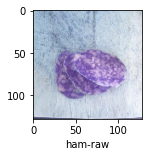

In [ ]:
plot_sample(X_test , y_classes_selu , 15)

#### SIGMOID

In [ ]:
cnn_sigmoid = models.Sequential([
    #cnn layers
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = "sigmoid",padding = "same" ,input_shape = (128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    
    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = "sigmoid"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    
    layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = "sigmoid"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(filters = 256, kernel_size = (3, 3), activation = "sigmoid"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    #dense layers
    layers.Flatten(), 
    layers.Dense(256, activation = "sigmoid"),
    layers.Dense(61, activation = "softmax")
])

In [ ]:
cnn_sigmoid.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam", metrics = ["accuracy"])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()
itr = datagen.flow(X_train, y_train)
history_sigmoid = cnn_sigmoid.fit_generator(itr, epochs = 5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
292/292 [==============================] - 372s 1s/step - loss: 3.6616 - accuracy: 0.1406
Epoch 2/5
292/292 [==============================] - 375s 1s/step - loss: 3.1776 - accuracy: 0.2057
Epoch 3/5
292/292 [==============================] - 374s 1s/step - loss: 2.9917 - accuracy: 0.2399
Epoch 4/5
292/292 [==============================] - 371s 1s/step - loss: 2.8534 - accuracy: 0.2644
Epoch 5/5
292/292 [==============================] - 371s 1s/step - loss: 2.7351 - accuracy: 0.2858


In [ ]:
y_pred_sigmoid = cnn_sigmoid.predict(X_test)

In [ ]:
y_classes_sigmoid = [np.argmax(element) for element in y_pred_sigmoid]

Predicting for test image 25

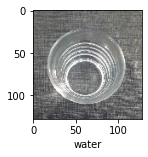

In [ ]:
plot_sample(X_test , y_classes_sigmoid , 25)

In [ ]:
# Create Submission file        
df = pd.DataFrame(le.inverse_transform(preds),columns=['ClassName'])
df.to_csv('submission.csv',index=False)

## Different Pooling Strategy

Average Pooling

In [ ]:
cnn_pooling = models.Sequential([
    #cnn layers
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu",padding = "same" ,input_shape = (128, 128, 3)),
    layers.BatchNormalization(),
    layers.AveragePooling2D((2, 2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
    layers.BatchNormalization(),
    layers.AveragePooling2D((2, 2)),
    
    layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu"),
    layers.BatchNormalization(),
    layers.AveragePooling2D((2, 2)),

    layers.Conv2D(filters = 256, kernel_size = (3, 3), activation = "relu"),
    layers.BatchNormalization(),
    layers.AveragePooling2D((2, 2)),

    #dense layers
    layers.Flatten(), 
    layers.Dense(256, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(61, activation = "softmax")
])

In [ ]:
cnn_pooling.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam", metrics = ["accuracy"])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()
itr = datagen.flow(X_train, y_train)
history_pooling = cnn_pooling.fit_generator(itr, epochs = 4)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/4
292/292 [==============================] - 382s 1s/step - loss: 4.0231 - accuracy: 0.1216
Epoch 2/4
292/292 [==============================] - 380s 1s/step - loss: 3.3320 - accuracy: 0.1947
Epoch 3/4
292/292 [==============================] - 380s 1s/step - loss: 3.0610 - accuracy: 0.2319
Epoch 4/4
292/292 [==============================] - 381s 1s/step - loss: 2.8583 - accuracy: 0.2573


In [ ]:
y_pred_pooling = cnn_pooling.predict(X_test)

In [ ]:
y_classes_pooling = [np.argmax(element) for element in y_pred_pooling]

Plotting predicted Label for test image 36

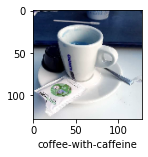

In [ ]:
plot_sample(X_test , y_classes_wbn , 36)

Plotting Epoch vs Accuracy graph

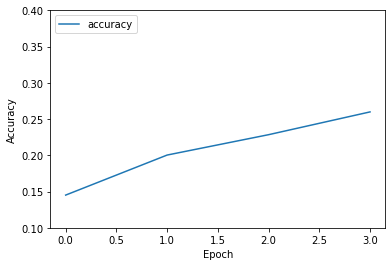

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_pooling.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 0.4])
plt.legend(loc='upper left')

Creating submission.csv from Predicted y from X_test

In [ ]:
df = pd.DataFrame(le.inverse_transform(y_classes_pooling),columns=['ClassName'])
df.to_csv('submission.csv',index=False)

Code for downloading the submission.csv

In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Different Optimizers

SGD

In [ ]:
cnn_sgd = models.Sequential([
    #cnn layers
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu",padding = "same" ,input_shape = (128, 128, 3)),
    layers.BatchNormalization(),
    layers.AveragePooling2D((2, 2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
    layers.BatchNormalization(),
    layers.AveragePooling2D((2, 2)),
    
    layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu"),
    layers.BatchNormalization(),
    layers.AveragePooling2D((2, 2)),

    layers.Conv2D(filters = 256, kernel_size = (3, 3), activation = "relu"),
    layers.BatchNormalization(),
    layers.AveragePooling2D((2, 2)),

    #dense layers
    layers.Flatten(), 
    layers.Dense(256, activation = "relu"),
    layers.Dense(61, activation = "softmax")
])

In [ ]:
cnn_sgd.compile(loss = "sparse_categorical_crossentropy",optimizer = "sgd", metrics = ["accuracy"])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()
itr = datagen.flow(X_train, y_train)
history_sgd = cnn_sgd.fit_generator(itr, epochs = 5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
292/292 [==============================] - 382s 1s/step - loss: 3.7123 - accuracy: 0.1540
Epoch 2/5
292/292 [==============================] - 382s 1s/step - loss: 2.8025 - accuracy: 0.2812
Epoch 3/5
292/292 [==============================] - 380s 1s/step - loss: 2.3095 - accuracy: 0.3775
Epoch 4/5
292/292 [==============================] - 381s 1s/step - loss: 1.8983 - accuracy: 0.4789
Epoch 5/5
292/292 [==============================] - 381s 1s/step - loss: 1.5646 - accuracy: 0.5727


In [ ]:
y_pred_sgd = cnn_sgd.predict(X_test)

In [ ]:
y_classes_sgd = [np.argmax(element) for element in y_pred_sgd]

Plotting predicted Label for test image 71

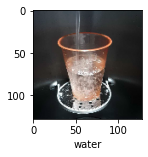

In [ ]:
plot_sample(X_test , y_classes_sgd , 71)

Plotting Epoch vs Accuracy graph

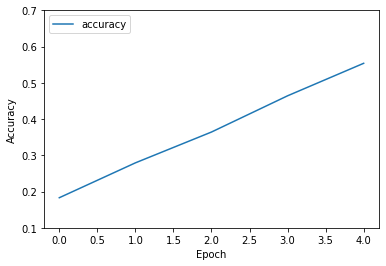

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_sgd.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 0.7])
plt.legend(loc='upper left')

Creating submission.csv from Predicted y from X_test

In [ ]:
df = pd.DataFrame(le.inverse_transform(y_classes_sgd),columns=['ClassName'])
df.to_csv('submission.csv',index=False)

Code for downloading the submission.csv

In [ ]:
from google.colab import files
files.download('submission.csv')

## Basic Augmentation using ImageDataGenerator

In [ ]:
cnn_new_ = models.Sequential([
    #cnn layers
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu",padding = "same" ,input_shape = (128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters = 256, kernel_size = (3, 3), activation = "relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    #dense layers
    layers.Flatten(), 
    layers.Dense(256, activation = "relu"),
    layers.Dense(61, activation = "softmax")
])

In [ ]:
cnn_new_.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam", metrics = ["accuracy"])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()
itr = datagen.flow(X_train, y_train)
history_new_ = cnn_new_.fit_generator(itr, epochs = 12)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/12
292/292 [==============================] - 405s 1s/step - loss: 4.1579 - accuracy: 0.1418
Epoch 2/12
292/292 [==============================] - 402s 1s/step - loss: 3.1384 - accuracy: 0.2360
Epoch 3/12
292/292 [==============================] - 402s 1s/step - loss: 2.8026 - accuracy: 0.2807
Epoch 4/12
292/292 [==============================] - 403s 1s/step - loss: 2.5832 - accuracy: 0.3120
Epoch 5/12
292/292 [==============================] - 403s 1s/step - loss: 2.2988 - accuracy: 0.3575
Epoch 6/12
292/292 [==============================] - 403s 1s/step - loss: 2.0631 - accuracy: 0.4118
Epoch 7/12
292/292 [==============================] - 403s 1s/step - loss: 1.8476 - accuracy: 0.4597
Epoch 8/12
292/292 [==============================] - 404s 1s/step - loss: 1.5579 - accuracy: 0.5347
Epoch 9/12
292/292 [==============================] - 404s 1s/step - loss: 1.2224 - accuracy: 0.6234
Epoch 10/12
292/292 [==============================] - 405s 1s/step - loss: 0.9029 - accura

In [ ]:
y_pred_new_ = cnn_new_.predict(X_test)

In [ ]:
y_classes_new_ = [np.argmax(element) for element in y_pred_new_]

Plotting predicted Label for test image 90

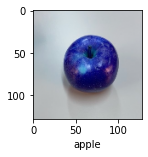

In [ ]:
plot_sample(X_test , y_classes_new_ , 90)

Plotting Epoch vs Accuracy graph

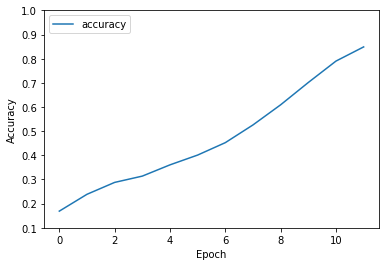

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_new_.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='upper left')

Creating submission.csv from Predicted y from X_test

In [ ]:
df = pd.DataFrame(le.inverse_transform(y_classes_new_),columns=['ClassName'])
df.to_csv('submission.csv',index=False)

Code for downloading the submission.csv

In [ ]:
from google.colab import files
files.download('submission.csv')

Summary of the best model

In [ ]:
cnn_new_.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 62, 62, 64)        18496     
_________________________________________________________________
batch_normalization_16 (Batc (None, 62, 62, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 29, 29, 128)      

Saving the best model

In [ ]:
cnn_new_.save('/content/drive/MyDrive/CV')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CV/assets


## Making Direct Submission thought Aicrowd CLI

In [ ]:
!aicrowd submission create -c chunin-exams-food-track-cv-2021 -f submission.csv

submission.csv ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0% • 7.7/6.1 KB • ? • 0:00:00
                                               ╭─────────────────────────╮                                               
                                               │ Successfully submitted! │                                               
                                               ╰─────────────────────────╯                                               
                                                     Important links                                                     
┌──────────────────┬────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/chunin-exams-food-track-cv-2021/submissions/131078              │
│                  │                                                                                                    │
│  All submissions │ https://www.aicrowd.com/challenges/chunin-ex